## 1. Response Transformation

In [ ]:
from transformers import pipeline
import torch

classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli",
                      device="cuda:0")

second_response = "Yes, Mostly. My heart races suddenly, especially when I’m anxious or stressed, and sometimes it makes me feel lightheaded."
first_response = "I feel relaxed and at peace these days"
third_response = "I often feel on edge, especially when I have too much to do."

rp_hb_labels = ['No', 'Rarely', 'Often', 'Mostly', 'All the time']
stress_labels = ['Relaxed','Tensed','Slightly Stressed','Moderately Stressed', 'Extremely Stressed']
deal_with_anxiety_labels = ['No anxiety', 'Slightly Anxious', 'Moderately Anxious','Highly Anxious' ,'Extremely anxious']


result = classifier(second_response, candidate_labels=rp_hb_labels)
first_result = classifier(first_response, candidate_labels=stress_labels)
third_result = classifier(third_response, candidate_labels=deal_with_anxiety_labels)

q1_val = rp_hb_labels.index(result['labels'][0]) + 1
print(q1_val)

print(third_result)

Device set to use cuda:0


4
{'sequence': 'I often feel on edge, especially when I have too much to do.', 'labels': ['Slightly Anxious', 'Extremely anxious', 'Highly Anxious', 'Moderately Anxious', 'No anxiety'], 'scores': [0.5259250402450562, 0.19281929731369019, 0.1897270828485489, 0.08671156316995621, 0.004817047622054815]}


In [ ]:
import json

with open('topic_labels.json', 'r', encoding='utf-8') as tl:
    questions_json = json.load(tl)

questions_json


{'experienced_stress': ['All the time', 'Mostly', 'Often', 'Rarely', 'No'],
 'rapid_heartbeats': ['Extremely Stressed',
  'Highly Stressed',
  'Moderately Stressed',
  'Slightly Stressed',
  'Relaxed'],
 'anxiety': ['Extremely anxious',
  'Highly Anxious',
  'Moderately Anxious',
  'Slightly Anxious',
  'No anxiety'],
 'sleep_problems': ['Extremely big problem',
  'Big problem',
  'Moderate problem',
  'Slight problem',
  'No problems'],
 'tension': ['Extreme Tension',
  'High Tension',
  'Moderate Tension',
  'Slight Tension',
  'No Tension'],
 'headaches': ['Lot of times',
  'Regularly',
  'Not often',
  'Rarely',
  'Extremely Rarely'],
 'irritated': ['Extremely easily irritated',
  'Easily irritated',
  'Neither easy nor hard to get irritated',
  'hard to get irritated',
  'Extremely hard to get irritated'],
 'concentration_trouble': ['Extreme trouble',
  'Slight trouble',
  'No trouble',
  'Slightly focused',
  'Extremely focused'],
 'sadness': ['Extremely sad',
  'Slightly sad',
 

In [ ]:
def print_label_class_response(model, topic_json_data, topic_key, topic_response):
  labelling_result = model(topic_response, candidate_labels=topic_json_data[topic_key])

  label_numeric = topic_json_data[topic_key].index(labelling_result['labels'][0]) + 1

  print(f"Response: {topic_response} | Related to: {topic_key}")
  print(f"Label in Numeric: {label_numeric} | Label Text: {topic_json_data[topic_key][label_numeric-1]}\n")

  return label_numeric

In [ ]:
## Using the function to get some predictions
from transformers import pipeline
import torch
from timeit import default_timer as timer

start_time = timer()
response_analyzer = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli",
                      device="cuda:0")

with open('sample_response.json', 'r', encoding='utf-8') as f:
  user_response = json.load(f)

with open('topic_labels.json', 'r', encoding='utf-8') as g:
  topic_label_json = json.load(g)

response_numeric = []

for key in user_response:
  label_numeric = print_label_class_response(model=response_analyzer,
                             topic_json_data=topic_label_json,
                             topic_key=key,
                             topic_response=user_response[key]['response'])
  response_numeric.append(label_numeric)

end_time = timer()

print(f"Response in numeric: {response_numeric}")
print(f"It took {end_time - start_time:.3f} seconds to extract numeric attributes from response")

Device set to use cuda:0


Response: Yes, definitely. Between exams, projects, and personal stuff, it’s been pretty overwhelming. | Related to: experienced_stress
Label in Numeric: 2 | Label Text: Mostly

Response: Occasionally, especially when I’m anxious or rushing to class, but it’s not frequent. | Related to: rapid_heartbeats
Label in Numeric: 4 | Label Text: Slightly Stressed

Response: A little bit — mostly just normal college stress, nothing too intense. | Related to: anxiety
Label in Numeric: 3 | Label Text: Moderately Anxious

Response: Yes, but I’m trying new things like avoiding screens before bed, and it’s been helping. | Related to: sleep_problems
Label in Numeric: 4 | Label Text: Slight problem

Response: Yeah, I’ve been dealing with some anxiety recently, but I’m trying to manage it. | Related to: tension
Label in Numeric: 4 | Label Text: Slight Tension

Response: Not really — my headaches are about the same as before. | Related to: headaches
Label in Numeric: 3 | Label Text: Not often

Response: 

## 2.Stress Classifier with ML/DL models

### Models to be used


*   Random Forest
*   Decision Trees
*   ANNs (build with pytorch)
*   Support Vector Machine
*   kNN
*   Adaboost
*   Naive Bayes Classifier













### Preprocessing

In [11]:
import pandas as pd

data = pd.read_csv('Stress Dataset.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X[:5], y[:5]

(array([[ 0, 20,  3,  4,  2,  5,  1,  2,  1,  2,  2,  3,  1,  5,  1,  2,
          3,  1,  4,  1,  2,  1,  3,  1,  2],
        [ 0, 20,  2,  3,  2,  1,  1,  1,  1,  4,  2,  1,  2,  1,  2,  4,
          3,  2,  1,  1,  3,  2,  1,  4,  2],
        [ 0, 20,  5,  4,  2,  2,  1,  3,  4,  2,  3,  2,  3,  4,  5,  2,
          2,  2,  2,  1,  4,  1,  1,  2,  1],
        [ 1, 20,  3,  4,  3,  2,  2,  3,  4,  3,  5,  2,  4,  1,  2,  3,
          1,  1,  2,  1,  2,  1,  1,  5,  3],
        [ 0, 20,  3,  3,  3,  2,  2,  4,  4,  4,  4,  1,  1,  1,  2,  1,
          2,  3,  1,  2,  2,  4,  2,  2,  2]]),
 array(['Eustress (Positive Stress) - Stress that motivates and enhances performance.',
        'Eustress (Positive Stress) - Stress that motivates and enhances performance.',
        'Eustress (Positive Stress) - Stress that motivates and enhances performance.',
        'Eustress (Positive Stress) - Stress that motivates and enhances performance.',
        'Eustress (Positive Stress) - Stress that m

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
stress_labels = le.classes_

y[:5], stress_labels

(array([1, 1, 1, 1, 1]),
 array(['Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.',
        'Eustress (Positive Stress) - Stress that motivates and enhances performance.',
        'No Stress - Currently experiencing minimal to no stress.'],
       dtype=object))

In [23]:
# Training and Testing Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2,
                                                    random_state=63)

X_train

array([[ 0, 20,  1, ...,  4,  2,  3],
       [ 0, 19,  3, ...,  4,  4,  1],
       [ 0, 20,  3, ...,  2,  2,  1],
       ...,
       [ 1, 19,  5, ...,  3,  3,  3],
       [ 0, 41,  2, ...,  2,  4,  2],
       [ 0, 22,  3, ...,  2,  4,  2]], shape=(674, 25))

### ANN

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [ ]:
import pandas as pd

stress_data = pd.read_csv('Stress Dataset.csv')

stress_data.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
stress_data['encoded_stress'] = le.fit_transform(stress_data['Which type of stress do you primarily experience?'])

In [ ]:
stress_data.drop(columns=['Which type of stress do you primarily experience?'],
                 inplace=True)

In [ ]:
(stress_data['encoded_stress'].value_counts() * 100) / len(stress_data)

encoded_stress
1    91.103203
2     5.100830
0     3.795967
Name: count, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
import torch

X = torch.tensor(stress_data.iloc[:, :-1].to_numpy(), dtype=torch.float32).to(device)
y = torch.tensor(stress_data.iloc[:, -1].to_numpy(), dtype=torch.int64).to(device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

X.shape, y.shape

(torch.Size([843, 25]), torch.Size([843]))

In [ ]:
from torch import nn

class StressANN(nn.Module):
  def __init__(self):
    super().__init__()

    self.inp_layer = nn.Linear(in_features=25,
                               out_features=64)

    self.hidden_layer = nn.Linear(in_features=64,
                                  out_features=64)

    self.activation = nn.ReLU()

    self.classifier = nn.Linear(in_features=64,
                                out_features=3)

  def forward(self, x):
    out = self.inp_layer(x)
    out = self.hidden_layer(out)
    out = self.activation(out)
    out = self.classifier(out)

    return out

In [ ]:
import torch

SEED = 69
torch.manual_seed(SEED)

ann_model = StressANN().to(device)

ann_model

StressANN(
  (inp_layer): Linear(in_features=25, out_features=64, bias=True)
  (hidden_layer): Linear(in_features=64, out_features=64, bias=True)
  (activation): ReLU()
  (classifier): Linear(in_features=64, out_features=3, bias=True)
)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# Suppose y_train is a 1D NumPy array or list of your training labels
classes = np.unique(y_train.cpu())
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train.cpu().numpy())

# Convert to tensor (PyTorch expects float tensor)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device) / 10
print("Class weights:", class_weights)


Class weights: tensor([0.9361, 0.0367, 0.5912], device='cuda:0')


In [ ]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

LEARNING_RATE = 1e-3

class_weights = torch.tensor([0.9161, 0.0767, 0.5712]).to(device)

loss_fn = CrossEntropyLoss(weight=class_weights)
optimizer = Adam(params=ann_model.parameters(),
                 lr=LEARNING_RATE)

In [ ]:
NUM_EPOCHS = 200

In [ ]:
import torch
from torchmetrics import Accuracy

acc_fn = Accuracy(task='multiclass', num_classes=3).to(device)


for ep in range(NUM_EPOCHS):
  ann_model.train()

  preds = ann_model(X_train)
  pred_probs = torch.softmax(preds, dim=1)
  pred_labels = torch.argmax(pred_probs, dim=1)

  training_loss_result = loss_fn(pred_probs, y_train)
  optimizer.zero_grad()

  training_loss_result.backward()
  optimizer.step()


  ann_model.eval()
  with torch.inference_mode():
    test_outputs = ann_model(X_test)
    test_probs = torch.softmax(test_outputs, dim=1)
    test_label = torch.argmax(test_probs, dim=1)
    test_loss_result = loss_fn(test_probs, y_test)

    acc_score = acc_fn(test_label, y_test)

  if(ep%10 == 0):
    print(f"Epoch: {ep+1} | Training Loss: {training_loss_result} | Test Loss: {test_loss_result} | Accuracy: {acc_score*100}")


Epoch: 1 | Training Loss: 0.6187832951545715 | Test Loss: 0.7632083892822266 | Accuracy: 86.98225402832031
Epoch: 11 | Training Loss: 0.6163869500160217 | Test Loss: 0.7649853229522705 | Accuracy: 86.98225402832031
Epoch: 21 | Training Loss: 0.614275336265564 | Test Loss: 0.7674586176872253 | Accuracy: 86.39053344726562
Epoch: 31 | Training Loss: 0.6123159527778625 | Test Loss: 0.7684919238090515 | Accuracy: 86.98225402832031
Epoch: 41 | Training Loss: 0.6105096340179443 | Test Loss: 0.7726903557777405 | Accuracy: 86.98225402832031
Epoch: 51 | Training Loss: 0.6088125705718994 | Test Loss: 0.7761658430099487 | Accuracy: 86.98225402832031
Epoch: 61 | Training Loss: 0.6072531342506409 | Test Loss: 0.7786331176757812 | Accuracy: 86.98225402832031
Epoch: 71 | Training Loss: 0.6057708263397217 | Test Loss: 0.7818461656570435 | Accuracy: 86.98225402832031
Epoch: 81 | Training Loss: 0.6043485403060913 | Test Loss: 0.7851470708847046 | Accuracy: 86.98225402832031
Epoch: 91 | Training Loss: 0.6

In [ ]:
import torch
from torchmetrics import ConfusionMatrix

cm = ConfusionMatrix(task="multiclass", num_classes=3).to(device)

ann_model.eval()
with torch.inference_mode():
  y_pred = ann_model(X_test).to(device)

cm_result = cm(y_pred, y_test)


C:\Users\avrah\AppData\Local\Temp\ipykernel_3404\1020147589.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  cmd = ConfusionMatrixDisplay(confusion_matrix=np.array(cm_result.cpu()),


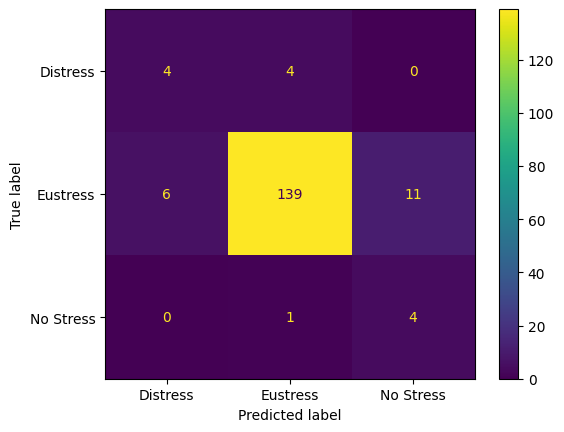

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

cmd = ConfusionMatrixDisplay(confusion_matrix=np.array(cm_result.cpu()),
                             display_labels=['Distress', 'Eustress', 'No Stress'])

cmd.plot()

In [ ]:
from torchmetrics import F1Score, Precision, Recall

f1_obj = F1Score(task="multiclass", num_classes=len(le.classes_)).to(device)
recall_obj = Recall(task="multiclass", num_classes=len(le.classes_)).to(device)
precision_obj = Precision(task="multiclass", num_classes=len(le.classes_)).to(device)

f1_val = f1_obj(y_pred, y_test)
prec_val = precision_obj(y_pred, y_test)
rec_val = recall_obj(y_pred, y_test)

print(f"Precision: {prec_val.item():.4f} | Recall: {rec_val.item():.4f} | F1-Score: {f1_val.item():.4f}")

Precision: 0.8698 | Recall: 0.8698 | F1-Score: 0.8698


In [ ]:
# Saving the ANN model
import torch
from pathlib import Path

MODEL_PATH = Path('model_weights')

MODEL_NAME =  f"Stress_ANN_Weights_{NUM_EPOCHS}_Epochs.pth"


In [ ]:
torch.save(ann_model.state_dict(), MODEL_PATH / MODEL_NAME)

In [ ]:
# Loading the ANN model

new_ann_model = StressANN().to(device)
new_ann_model.load_state_dict(torch.load(MODEL_PATH / MODEL_NAME, weights_only=True))

<All keys matched successfully>

In [ ]:
import torch

new_ann_model.eval()
with torch.inference_mode():
  test_logits = new_ann_model(X_train)
  test_pred_probs = torch.softmax(test_logits,dim=1)
  test_pred_label = torch.argmax(test_pred_probs, dim=1)

  print(f"Actual: {y_train} | Predicted: {test_pred_label}")

Actual: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 

### kNN

In [24]:
# kNN implementation

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10,
                                 weights="distance") # Since classes are heavily imbalanced
knn_model.fit(X_train, y_train)

,n_neighbors,10
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
knn_ypred = knn_model.predict(X_test)

knn_ypred[:5]

array([1, 1, 1, 1, 1])

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_ypred))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.95      1.00      0.97       154
           2       1.00      0.44      0.62         9

    accuracy                           0.95       169
   macro avg       0.98      0.65      0.75       169
weighted avg       0.96      0.95      0.94       169



### SVM

In [28]:

from sklearn.svm import SVC

svm_model = SVC(max_iter=100)
svm_model.fit(X_train, y_train)

C:\Users\avrah\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
svm_ypred = svm_model.predict(X_test)

svm_ypred[:5]

array([1, 1, 1, 1, 1])

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_ypred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00         6
           1       0.91      1.00      0.95       154
           2       1.00      0.00      0.00         9

    accuracy                           0.91       169
   macro avg       0.97      0.33      0.32       169
weighted avg       0.92      0.91      0.87       169



### Decision Trees

In [32]:

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="entropy",
                                  splitter="best",
                                  class_weight="balanced",
                                  random_state=40)

dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [33]:
dt_ypred = dt_model.predict(X_test)

dt_ypred[:5]

array([1, 1, 1, 1, 1])

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_ypred, zero_division=1))


              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.95      0.97      0.96       154
           2       0.62      0.56      0.59         9

    accuracy                           0.93       169
   macro avg       0.75      0.62      0.66       169
weighted avg       0.92      0.93      0.92       169



### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10,
                                  criterion="entropy",
                                  class_weight="balanced",
                                  random_state=50)

rf_model.fit(X_train, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
rf_ypred = rf_model.predict(X_test)

rf_ypred[:5]

array([1, 1, 1, 1, 1])

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_ypred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.94      1.00      0.97       154
           2       1.00      0.44      0.62         9

    accuracy                           0.94       169
   macro avg       0.98      0.54      0.62       169
weighted avg       0.94      0.94      0.93       169



### Adaboost

In [126]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_dt_model = DecisionTreeClassifier(criterion="entropy",
                                  splitter="best",
                                  class_weight="balanced",
                                  random_state=40)

adab_model = AdaBoostClassifier(estimator=ada_dt_model,
                                n_estimators=100,
                                learning_rate=0.4)

adab_model.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=40)
,n_estimators,100
,learning_rate,0.4
,algorithm,'deprecated'
,random_state,None
,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [127]:
adab_ypred = adab_model.predict(X_test)

adab_ypred[:5]

array([2, 1, 1, 1, 1])

In [128]:
from sklearn.metrics import classification_report

print(classification_report(y_test, adab_ypred, zero_division=1))


              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.94      0.98      0.96       154
           2       0.80      0.44      0.57         9

    accuracy                           0.93       169
   macro avg       0.75      0.59      0.64       169
weighted avg       0.92      0.93      0.92       169



### Naive Bayes

In [129]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()

mnb_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [130]:
mnb_ypred = mnb_model.predict(X_test)

mnb_ypred[:5]

array([1, 1, 1, 1, 1])

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, mnb_ypred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00         6
           1       0.91      1.00      0.95       154
           2       1.00      0.00      0.00         9

    accuracy                           0.91       169
   macro avg       0.97      0.33      0.32       169
weighted avg       0.92      0.91      0.87       169



### Saving the Best Model

In [133]:
import pickle

with open('model_weights/best_model.pkl', 'wb') as f:
  pickle.dump(knn_model, f)

### Using the Best model

In [134]:
with open('model_weights/best_model.pkl', 'rb') as f:
  best_model = pickle.load(f)

In [136]:
best_model_pred = best_model.predict(X_test)

best_model_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1])

## 3. Stress Advisor

In [ ]:
!pip install ollama-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached ollama_python-0.1.2-py3-none-any.whl.metadata (11 kB)
  Using cached httpx-0.26.0-py3-none-any.whl.metadata (7.6 kB)
  Using cached responses-0.24.1-py3-none-any.whl.metadata (46 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached ollama_python-0.1.2-py3-none-any.whl (16 kB)
Using cached httpx-0.26.0-py3-none-any.whl (75 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import ollama

ollama.generate(model='llama3:8b',
                prompt=f'Give some stress advice on the basis of the user conditions. Rapid heartbeat status: {rp_hb_labels[q1_val]} & Stress classified as Eustress by my classifier model.')

GenerateResponse(model='llama3:8b', created_at='2025-11-03T15:42:19.483743383Z', done=True, done_reason='stop', total_duration=82374060826, load_duration=67494029, prompt_eval_count=41, prompt_eval_duration=1702000000, eval_count=469, eval_duration=80597000000, response='You\'re experiencing rapid heartbeat (all the time) and consider your stress levels to be Eustress, which is a positive and motivating type of stress. Here are some tailored stress advice suggestions:\n\n**Rapid Heartbeat Status:**\n\n1. **Deep Breathing Exercises**: Practice slow, deep breathing exercises to help calm your heart rate. Inhale for 4 seconds, hold for 7 seconds, and exhale for 8 seconds. Repeat this process several times a day.\n2. **Physical Activity**: Engage in regular physical activity that you enjoy, such as walking, jogging, yoga, or swimming. This can help regulate your heart rate and reduce overall stress levels.\n3. **Progressive Muscle Relaxation**: Practice progressive muscle relaxation to rel